### Lets import all the libraries

In [1]:
import pandas as pd
import numpy as np


### Lets get the data

In [2]:
data = pd.read_csv("Company_Data.csv")
df = data.copy()
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Lets understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no nulls... GOOD

In [6]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
df[df["Sales"] == 0.0]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,0.0,139,24,0,358,185,Medium,79,15,No,No


In [8]:
# df["Sales"].max()

### Lets split into x and y

In [9]:
# pd.get_dummies(df)
y = df.iloc[:,:1]
y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [10]:
x = df.iloc[:,1:]

In [11]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
x["ShelveLoc"] = x["ShelveLoc"].replace("Bad",0)
x["ShelveLoc"] = x["ShelveLoc"].replace("Medium",1)
x["ShelveLoc"] = x["ShelveLoc"].replace("Good",2)



In [13]:
x["ShelveLoc"]= x["ShelveLoc"].astype(object)
x.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [14]:
x["ShelveLoc"].dtype

dtype('O')

In [15]:
con_cols = [col for col in x.columns if x[col].dtype != "object"]
cat_cols = [col for col in x.columns if x[col].dtype == "object"]

##### Lets Visualize the data

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1000 with 0 Axes>

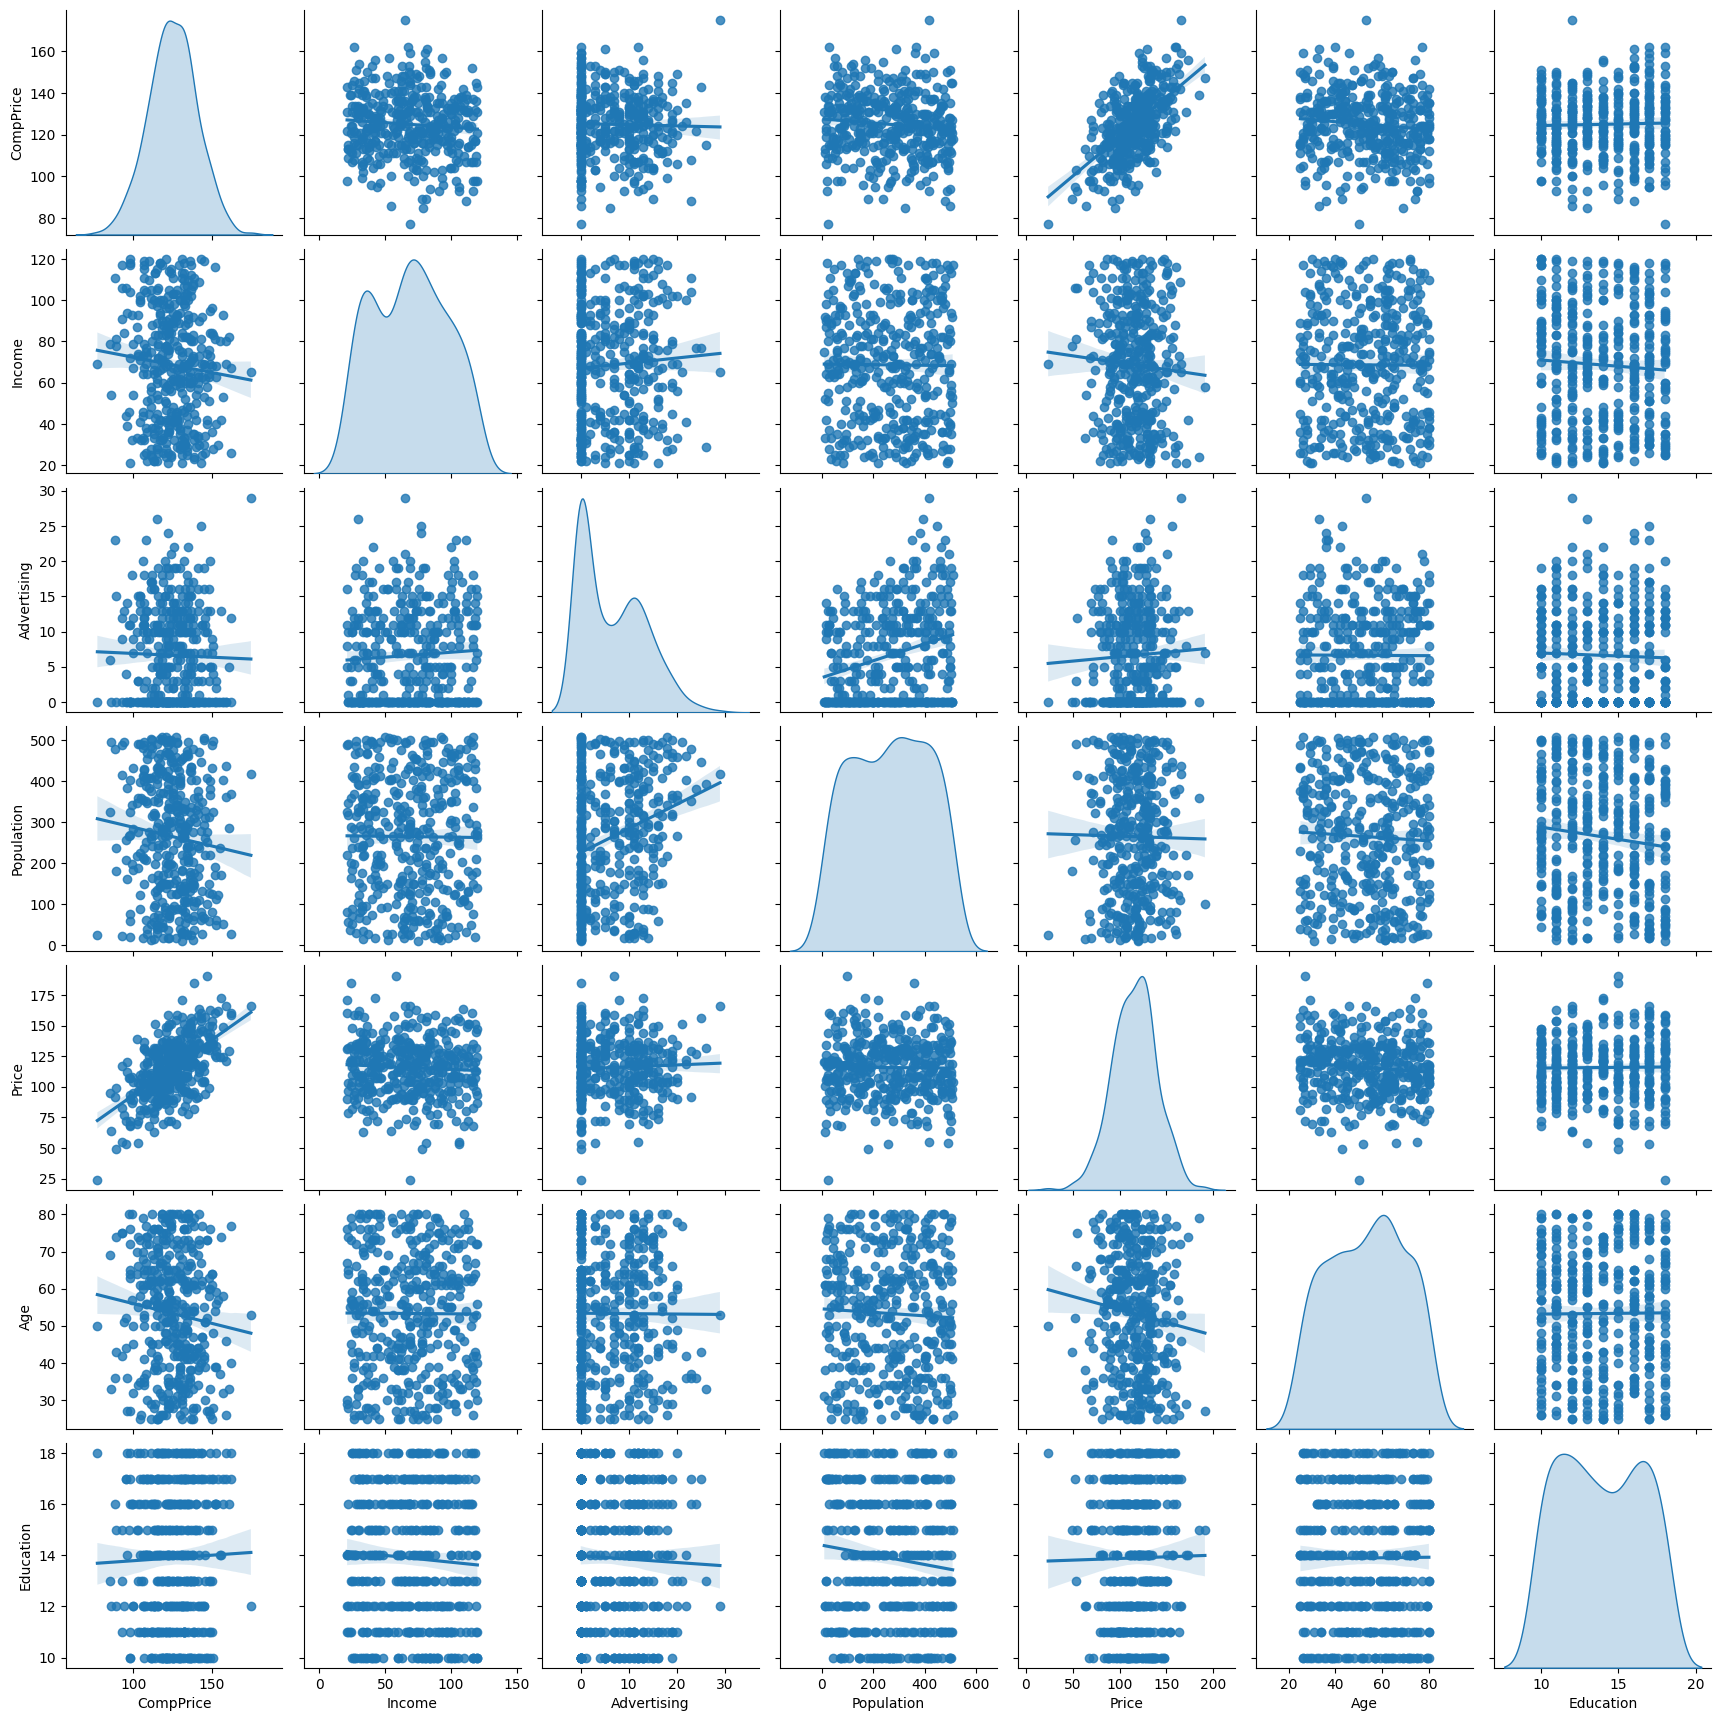

In [17]:
plt.figure(figsize=(14,10))
sns.pairplot(df[con_cols], kind="reg", diag_kind='kde')
plt.show()

In [18]:
print(df["Education"].value_counts())
print(df.shape)

Education
17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: count, dtype: int64
(400, 11)


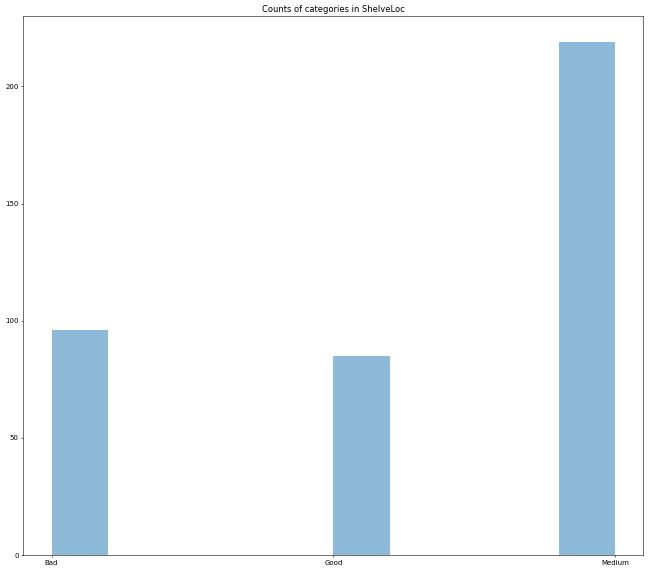

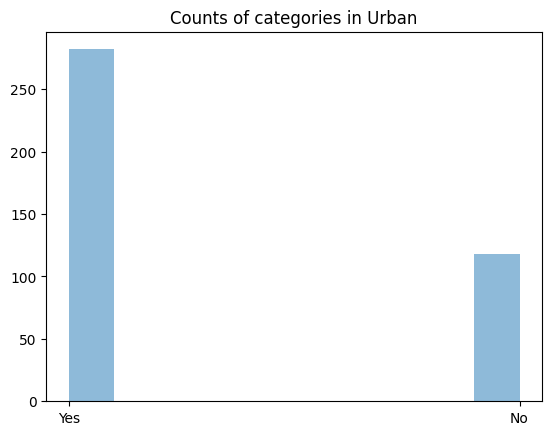

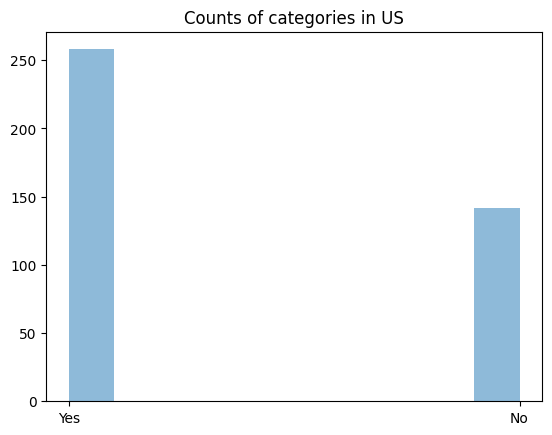

In [19]:
plt.subplots(figsize = (16,14), dpi = 50)
for i , col in enumerate(cat_cols):
    plt.hist(df[col] , alpha = 0.5)
    plt.title(f"Counts of categories in {col}")
    plt.show()

### Lets check for outliers

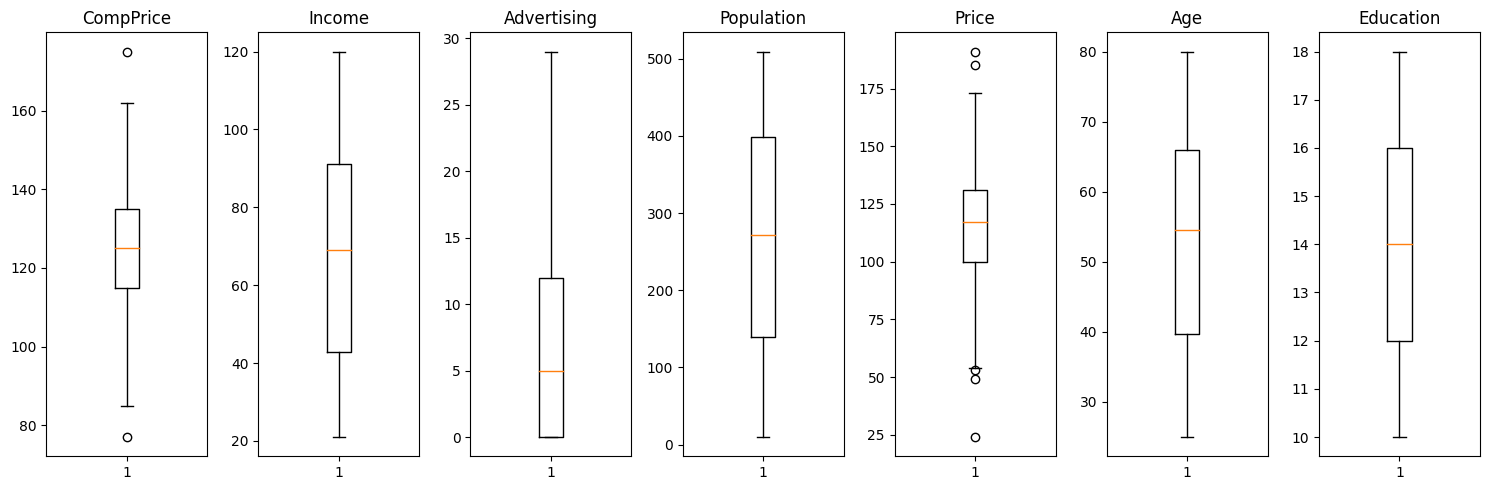

In [20]:
plt.figure(figsize=(15, 5))

sub = 151  # Adjust the starting subplot number

for i, col in enumerate(con_cols, 1):  # Start the loop from 1
    try:
        plt.subplot(1, len(con_cols), i)

        plt.boxplot(df[col])
        plt.title(col)
    except Exception as e:
        print(col, e)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


As we can see only Price and Comprice have outliers

### Lets Split the Data into train and test

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,117,100,4,466,97,1,55,14,Yes,Yes
18,110,110,0,408,68,2,46,17,No,Yes
202,121,78,4,413,130,0,46,10,No,Yes
250,137,105,10,435,156,2,72,14,Yes,Yes
274,135,93,2,67,119,1,34,11,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,1,58,17,No,Yes
106,102,33,0,217,139,1,70,18,No,No
270,119,26,0,284,89,2,26,10,Yes,No
348,132,102,20,459,107,2,49,11,Yes,Yes


### Scaling and Encoding

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
x["ShelveLoc"].value_counts()

ShelveLoc
1    219
0     96
2     85
Name: count, dtype: int64

In [25]:
x.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [26]:
con_cols = [col for col in x.columns if x[col].dtype != "object"]
cat_cols = [col for col in x.columns if x[col].dtype == "object"]

In [27]:
con_cols

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

In [28]:
cat_cols

['ShelveLoc', 'Urban', 'US']

In [29]:
x_train[con_cols] = sc.fit_transform(x_train[con_cols])
x_test[con_cols] = sc.transform(x_test[con_cols])


In [30]:
# x_train
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,-1.721797,-1.659373,0.678338,0.374969,-1.108874,0,1.380468,-1.089818,No,Yes
280,-0.234947,0.625175,0.527282,1.547757,1.225876,0,-0.141338,-1.475594,Yes,Yes
33,-0.687466,-1.061875,0.980451,0.312880,0.504226,2,-0.202210,0.839063,Yes,Yes
210,0.023636,-0.956435,-0.681170,0.588830,0.291976,0,-0.384826,0.067511,No,Yes
93,1.316549,-1.343051,-0.983284,-1.411809,-0.514574,1,0.102151,1.224840,Yes,No
...,...,...,...,...,...,...,...,...,...,...
246,-0.299592,-0.429231,2.037847,-0.038956,-1.108874,0,1.502212,1.610616,Yes,Yes
227,-0.752112,-0.148056,0.527282,-1.404910,-0.641924,1,0.223896,0.839063,Yes,Yes
369,0.670093,1.117232,2.339960,1.320099,0.249526,1,-1.054421,0.067511,Yes,Yes
176,0.864030,1.363260,0.376225,1.437377,1.607926,1,-0.384826,-1.089818,No,Yes


In [31]:
cat_cols

['ShelveLoc', 'Urban', 'US']

In [32]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,-1.721797,-1.659373,0.678338,0.374969,-1.108874,0,1.380468,-1.089818,No,Yes
280,-0.234947,0.625175,0.527282,1.547757,1.225876,0,-0.141338,-1.475594,Yes,Yes
33,-0.687466,-1.061875,0.980451,0.312880,0.504226,2,-0.202210,0.839063,Yes,Yes
210,0.023636,-0.956435,-0.681170,0.588830,0.291976,0,-0.384826,0.067511,No,Yes
93,1.316549,-1.343051,-0.983284,-1.411809,-0.514574,1,0.102151,1.224840,Yes,No
...,...,...,...,...,...,...,...,...,...,...
246,-0.299592,-0.429231,2.037847,-0.038956,-1.108874,0,1.502212,1.610616,Yes,Yes
227,-0.752112,-0.148056,0.527282,-1.404910,-0.641924,1,0.223896,0.839063,Yes,Yes
369,0.670093,1.117232,2.339960,1.320099,0.249526,1,-1.054421,0.067511,Yes,Yes
176,0.864030,1.363260,0.376225,1.437377,1.607926,1,-0.384826,-1.089818,No,Yes


Lets encode it

In [33]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(handle_unknown="ignore")

In [34]:
# for cols in x_train[cat_cols].columns:
oe_train = pd.DataFrame(oe.fit_transform(x_train[cat_cols[1:]]).toarray(), index= x_train[cat_cols].index)
oe_test = pd.DataFrame(oe.transform(x_test[cat_cols[1:]]).toarray(),index=x_test[cat_cols].index)

In [35]:
oe_train["ShelveLoc"] = x_train["ShelveLoc"]
oe_test["ShelveLoc"] = x_test["ShelveLoc"]

In [36]:
oe_train

,0,1,2,3,ShelveLoc
3,0.0,1.0,0.0,1.0,1
18,1.0,0.0,0.0,1.0,2
202,1.0,0.0,0.0,1.0,0
250,0.0,1.0,0.0,1.0,2
274,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...
71,1.0,0.0,0.0,1.0,1
106,1.0,0.0,1.0,0.0,1
270,0.0,1.0,1.0,0.0,2
348,0.0,1.0,0.0,1.0,2


In [37]:
oe_test

,0,1,2,3,ShelveLoc
209,1.0,0.0,0.0,1.0,0
280,0.0,1.0,0.0,1.0,0
33,0.0,1.0,0.0,1.0,2
210,1.0,0.0,0.0,1.0,0
93,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...
246,0.0,1.0,0.0,1.0,0
227,0.0,1.0,0.0,1.0,1
369,0.0,1.0,0.0,1.0,1
176,1.0,0.0,0.0,1.0,1


Lets see how the final train and test turns out

In [38]:
train_final = pd.concat([x_train[con_cols],oe_train],axis=1)
test_final = pd.concat([x_test[con_cols],oe_test],axis=1)

In [39]:
train_final

,CompPrice,Income,Advertising,Population,Price,Age,Education,0,1,2,3,ShelveLoc
3,-0.493529,1.117232,-0.379057,1.340795,-0.811724,0.102151,0.067511,0.0,1.0,0.0,1.0,1
18,-0.946049,1.468701,-0.983284,0.940667,-2.042773,-0.445699,1.224840,1.0,0.0,0.0,1.0,2
202,-0.234947,0.344000,-0.379057,0.975161,0.589126,-0.445699,-1.475594,1.0,0.0,0.0,1.0,0
250,0.799384,1.292966,0.527282,1.126933,1.692826,1.136979,0.067511,0.0,1.0,0.0,1.0,2
274,0.670093,0.871204,-0.681170,-1.411809,0.122176,-1.176165,-1.089818,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.510486,-0.604966,1.433621,-0.853010,1.438126,0.284768,1.224840,1.0,0.0,0.0,1.0,1
106,-1.463214,-1.237610,-0.983284,-0.376995,0.971176,1.015234,1.610616,1.0,0.0,1.0,0.0,1
270,-0.364238,-1.483638,-0.983284,0.085221,-1.151324,-1.663143,-1.475594,0.0,1.0,1.0,0.0,2
348,0.476156,1.187526,2.037847,1.292504,-0.387224,-0.263082,-1.089818,0.0,1.0,0.0,1.0,2


In [40]:
test_final

,CompPrice,Income,Advertising,Population,Price,Age,Education,0,1,2,3,ShelveLoc
209,-1.721797,-1.659373,0.678338,0.374969,-1.108874,1.380468,-1.089818,1.0,0.0,0.0,1.0,0
280,-0.234947,0.625175,0.527282,1.547757,1.225876,-0.141338,-1.475594,0.0,1.0,0.0,1.0,0
33,-0.687466,-1.061875,0.980451,0.312880,0.504226,-0.202210,0.839063,0.0,1.0,0.0,1.0,2
210,0.023636,-0.956435,-0.681170,0.588830,0.291976,-0.384826,0.067511,1.0,0.0,0.0,1.0,0
93,1.316549,-1.343051,-0.983284,-1.411809,-0.514574,0.102151,1.224840,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
246,-0.299592,-0.429231,2.037847,-0.038956,-1.108874,1.502212,1.610616,0.0,1.0,0.0,1.0,0
227,-0.752112,-0.148056,0.527282,-1.404910,-0.641924,0.223896,0.839063,0.0,1.0,0.0,1.0,1
369,0.670093,1.117232,2.339960,1.320099,0.249526,-1.054421,0.067511,0.0,1.0,0.0,1.0,1
176,0.864030,1.363260,0.376225,1.437377,1.607926,-0.384826,-1.089818,1.0,0.0,0.0,1.0,1


### Training The Model

In [41]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(random_state=42)
train_final.columns = train_final.columns.astype(str)
test_final.columns = test_final.columns.astype(str)
dr.fit(train_final,y_train)


DecisionTreeRegressor(random_state=42)

Lets employ grid search CV for hyperparamtere tuning 

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,make_scorer

scorer= make_scorer(r2_score) 

params = {
    "max_depth" : [*range(3,8)],
    "min_samples_split":[*range(2,6)],

}

gcv = GridSearchCV(dr,params,verbose=32,cv=5, scoring= scorer)
gcv.fit(train_final,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START max_depth=3, min_samples_split=2...........................
[CV 1/5; 1/20] END max_depth=3, min_samples_split=2;, score=0.086 total time=   0.0s
[CV 2/5; 1/20] START max_depth=3, min_samples_split=2...........................
[CV 2/5; 1/20] END max_depth=3, min_samples_split=2;, score=0.256 total time=   0.0s
[CV 3/5; 1/20] START max_depth=3, min_samples_split=2...........................
[CV 3/5; 1/20] END max_depth=3, min_samples_split=2;, score=-0.042 total time=   0.0s
[CV 4/5; 1/20] START max_depth=3, min_samples_split=2...........................
[CV 4/5; 1/20] END max_depth=3, min_samples_split=2;, score=0.336 total time=   0.0s
[CV 5/5; 1/20] START max_depth=3, min_samples_split=2...........................
[CV 5/5; 1/20] END max_depth=3, min_samples_split=2;, score=0.280 total time=   0.0s
[CV 1/5; 2/20] START max_depth=3, min_samples_split=3...........................
[CV 1/5; 2/20] END max_dep

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring=make_scorer(r2_score), verbose=32)

### Lets see the best parameters

In [43]:
# gcv.best_params_

# sorted(gcv.cv_results_.keys())
# print(gcv.best_score_)
# r2_score(y_test,y_pred)
best_model = gcv.best_estimator_
# print(best_model)
y_pred_test = best_model.predict(test_final)
test_r2_score = r2_score(y_test, y_pred_test)
print("R2 Score on Test Set:", test_r2_score)

R2 Score on Test Set: 0.5122257104257849


In [44]:
params

{'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 3, 4, 5]}

In [45]:

y_pred = dr.predict(test_final)

In [46]:
y_test.shape

(80, 1)

Lets see both the predictions and the actual values side by side.

In [47]:
pd.DataFrame({"pred":y_pred,"actual":np.array(y_test).reshape(-1)})

,pred,actual
0,3.47,3.02
1,2.66,2.86
2,9.58,8.77
3,5.99,4.36
4,9.95,8.86
...,...,...
75,8.01,6.90
76,8.47,8.69
77,8.47,10.26
78,7.49,5.61


### Lets see the accuracy

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_pred)

0.48978888538587917